# Khushi Meena

## Supervised ML - Score Prediction
### Problem Statement - Predict the percentage of an student based on the no. of study hours.
### What will be predicted score if a student studies for 9.25 hrs/ day? 

#### Importing Necessary Libraries

In [50]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

#### Importing and Reading Data

In [51]:
score = pd.read_csv('http://bit.ly/w-data')

In [52]:
score.shape

(25, 2)

In [53]:
score.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


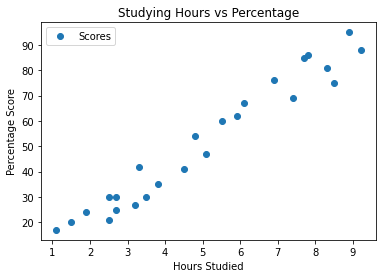

In [54]:
#Plotting Score Distribution
score.plot(x = 'Hours',y = 'Scores', style = 'o')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.title('Studying Hours vs Percentage')
plt.show()

A linear relationship can be seen here.

#### Data Manipulation

In [55]:
#Seperating Dependant and Independant variables
x = score.iloc[:, :-1].values
y = score.iloc[:,1].values

#Creating Train and Test DataSet
from sklearn.model_selection import train_test_split  
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.20, random_state=0, stratify = None) 

#### Implementing KNN Regressor /  Training Model

In [56]:
#Importing Linear Regressor
from sklearn.linear_model import LinearRegression as LR

# Creating instance of Linear Regresssion
lr = LR(normalize = True)

# Fitting the model
lr.fit(train_x, train_y)

#Parameters of linear Regression
lr.coef_, lr.intercept_

(array([9.91065648]), 2.018160041434662)

#### Plotting the Regression Line

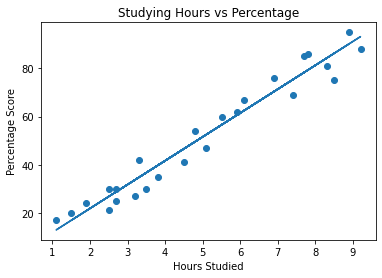

In [57]:
# Plotting the regression line
line = lr.coef_*x + lr.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line)
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.title('Studying Hours vs Percentage')
plt.show()

#### Making Predictions and Evaluating Model

In [58]:
# Predicting over the Train Set 
train_predict = lr.predict(train_x)


# mean absolute error as evaluation metric
from sklearn.metrics import mean_absolute_error as mae

k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )


Training Mean Absolute Error 5.186601709180373


In [59]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     4.183859899002982


In [60]:
score_ = pd.DataFrame({'Actual Score': test_y, 'Predicted Score': test_predict})
score_

,Actual Score,Predicted Score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### Predicted score if a student studies for 9.25 hrs/ day

In [61]:
#Method1

#Predicted score if a student studies for 9.25 hrs/ day
hours = 9.25
pred_score = lr.predict([[hours]])
print("The Predicted Score is = {} ".format(pred_score[0]))

The Predicted Score is = 93.69173248737539 


### The Predicted Score is 93.69173249 %